In [3]:
import pandas as pd
import numpy as np

def process_file(file_path, currency, convert_to_euro=False):
    df = pd.read_csv(file_path)
    
    # Convert date columns to dd-mm-yyyy format
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    
    # Columns to be kept
    columns_to_keep = ['Close']

    # Converts numbers to floating point and removes commas
    for col in columns_to_keep:
        df[col] = df[col].replace(',', '', regex=True).astype(float)

        # Convert to Euro if required
        if convert_to_euro:
            df[col] = df[col] * 0.92

    # Handle missing values by forward filling
    df = df[columns_to_keep].fillna(method='ffill')
    
    # Add the currency as a suffix to the retained columns
    df.columns = [f"{col}_{currency}" for col in columns_to_keep]

    return df

file_paths = {
    'ETH-EUR.csv': ('ETH', False),
    'BTC-EUR.csv': ('BTC', False),
    'DOGE-EUR.csv': ('DOGE', False),
    'USDT-EUR.csv': ('USDT', False),
    'XRP-EUR.csv': ('XRP', False),
    'S&P.csv': ('SP', True),  # Convert to Euro
    'Gold.csv': ('Gold', True),  # Convert to Euro
    'Apple.csv': ('Apple', True),  # Convert to Euro
    'Nasdaq.csv': ('Nasdaq', True),  # Convert to Euro
    'Silver.csv': ('Silver', True),  # Convert to Euro
    'Oil.csv': ('Oil', True),  # Convert to Euro
    'ADA-EUR.csv': ('ADA', False)
}


# Place the adjusted data in the dictionary
dataframes = {}
for file, (code, convert_to_euro) in file_paths.items():
    df_processed = process_file(file, code, convert_to_euro)
    dataframes[code] = df_processed

# Merge all data frames
combined_df = pd.concat(dataframes.values(), axis=1)

# Define a function that cleans the data
def clean_data(df):
    # Check for NaN and infinity values
    if df.isna().any().any() or np.isinf(df).any().any():
        # Handle NaN values 
        df = df.ffill().bfill()
        
        # Handle infinity values
        df.replace([np.inf, -np.inf], np.nan, inplace=True)

    return df

df_clean = clean_data(combined_df)
print(df_clean.head())

            Close_ETH  Close_BTC  Close_DOGE  Close_USDT  Close_XRP  \
Date                                                                  
2021-12-03    3740.07    47459.0    0.177822      0.8866     0.8231   
2021-12-04    3599.83    43084.0    0.156139      0.8870     0.7392   
2021-12-05    3672.30    43547.0    0.150662      0.8854     0.7081   
2021-12-06    3832.43    44321.0    0.157217      0.8872     0.7267   
2021-12-07    3809.00    44818.0    0.158516      0.8882     0.7250   

             Close_SP  Close_Gold  Close_Apple  Close_Nasdaq  Close_Silver  \
Date                                                                         
2021-12-03  4175.3556    1641.188     148.8928      1641.188      20.68252   
2021-12-04  4175.3556    1641.188     148.8928      1641.188      20.68252   
2021-12-05  4175.3556    1641.188     148.8928      1641.188      20.68252   
2021-12-06  4224.3364    1637.140     152.0944      1637.140      20.48196   
2021-12-07  4311.8100    1641.924 

/var/folders/2m/mym43cfn0zsfm6lsl_yf2wcc0000gn/T/ipykernel_29241/1948665422.py:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df[columns_to_keep].fillna(method='ffill')
/var/folders/2m/mym43cfn0zsfm6lsl_yf2wcc0000gn/T/ipykernel_29241/1948665422.py:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df[columns_to_keep].fillna(method='ffill')
/var/folders/2m/mym43cfn0zsfm6lsl_yf2wcc0000gn/T/ipykernel_29241/1948665422.py:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df[columns_to_keep].fillna(method='ffill')
/var/folders/2m/mym43cfn0zsfm6lsl_yf2wcc0000gn/T/ipykernel_29241/1948665422.py:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill(

In [27]:
## Test 1 Pearson Correlation Coefficient

"""
Hypothesis 1 (Correlation Among Cryptocurrencies):

Null Hypothesis (H0): There is no significant correlation 
between the market values of Ethereum and other cryptocurrencies.

Alternative Hypothesis (H1): Market values of Ethereum exhibit a significant correlation 
with other cryptocurrencies.
"""

from scipy.stats import pearsonr

# initialise two dictionaries to store coefficients and p-values
correlations = {}
p_values = {}

for column in df_clean.columns:
    
    # exclude the ETH column
    if column != 'Close_ETH':  
        corr, p_value = pearsonr(df_clean['Close_ETH'], df_clean[column])
        
        correlations[column.replace('Close_', '')] = corr
        p_values[column.replace('Close_', '')] = p_value

        # check if the p-value is less than 0.05
        if p_value < 0.05:
            print(f"ETH has a significant correlation with {column.replace('Close_', '')}: Pearson Correlation Coefficient = {corr:.4f}, p-value = {p_value:.4f}")
        else:
            print(f"ETH does not have a significant correlation with {column.replace('Close_', '')}: Pearson Correlation Coefficient = {corr:.4f}, p-value = {p_value:.4f}")

ETH has a significant correlation with BTC: Pearson Correlation Coefficient = 0.9053, p-value = 0.0000
ETH has a significant correlation with DOGE: Pearson Correlation Coefficient = 0.8662, p-value = 0.0000
ETH has a significant correlation with USDT: Pearson Correlation Coefficient = -0.5768, p-value = 0.0000
ETH has a significant correlation with XRP: Pearson Correlation Coefficient = 0.8399, p-value = 0.0000
ETH has a significant correlation with SP: Pearson Correlation Coefficient = 0.6966, p-value = 0.0000
ETH has a significant correlation with Gold: Pearson Correlation Coefficient = 0.1316, p-value = 0.0004
ETH has a significant correlation with Apple: Pearson Correlation Coefficient = 0.3993, p-value = 0.0000
ETH has a significant correlation with Nasdaq: Pearson Correlation Coefficient = -0.3501, p-value = 0.0000
ETH has a significant correlation with Silver: Pearson Correlation Coefficient = 0.3276, p-value = 0.0000
ETH has a significant correlation with Oil: Pearson Correlati

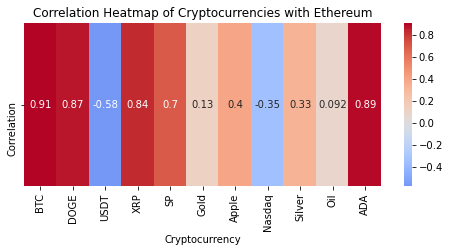

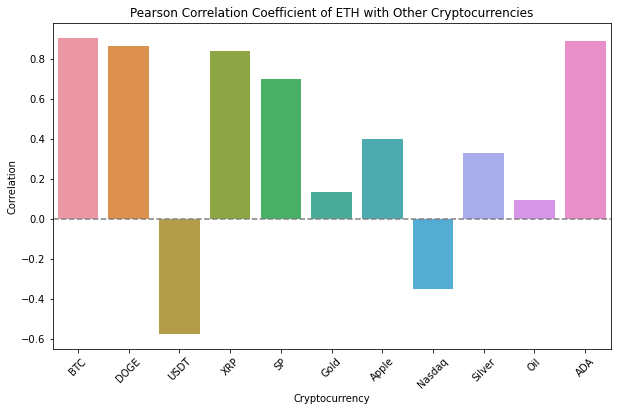

        Correlation  P-value
BTC          0.9053   0.0000
DOGE         0.8662   0.0000
USDT        -0.5768   0.0000
XRP          0.8399   0.0000
SP           0.6966   0.0000
Gold         0.1316   0.0004
Apple        0.3993   0.0000
Nasdaq      -0.3501   0.0000
Silver       0.3276   0.0000
Oil          0.0921   0.0127
ADA          0.8907   0.0000


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame from the correlations dictionary
corr_df = pd.DataFrame(list(correlations.items()), columns=['Cryptocurrency', 'Correlation'])
corr_df.set_index('Cryptocurrency', inplace=True)

# creating heatmap-like visualization
plt.figure(figsize=(8, 3))
sns.heatmap(corr_df.T, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Cryptocurrencies with Ethereum')
plt.show()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=corr_df.index, y=corr_df['Correlation'])
plt.title('Pearson Correlation Coefficient of ETH with Other Cryptocurrencies')
plt.axhline(0, color='grey', linestyle='--')
plt.xticks(rotation=45)  # Rotate the x labels if they overlap
plt.show()

#Correlation Matrix with P-values

import pandas as pd

# Correlation Matrix with P-values
# Combine the correlations and p-values into a single DataFrame
combined_results = pd.DataFrame({'Correlation': correlations, 'P-value': p_values})
combined_results_rounded = combined_results.round(4)
print(combined_results_rounded)



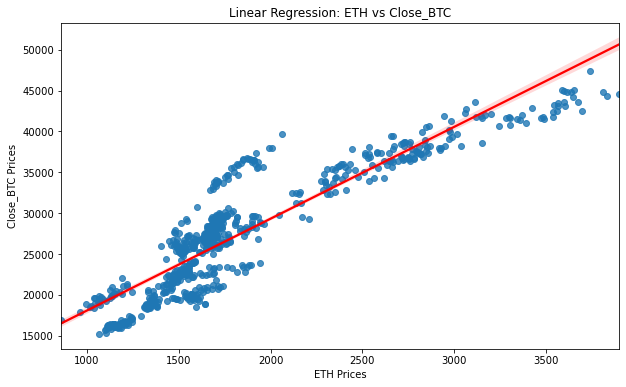

R-squared for ETH vs Close_BTC: 0.8195


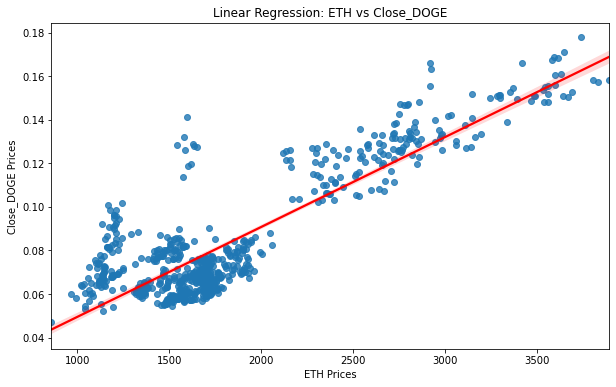

R-squared for ETH vs Close_DOGE: 0.7503


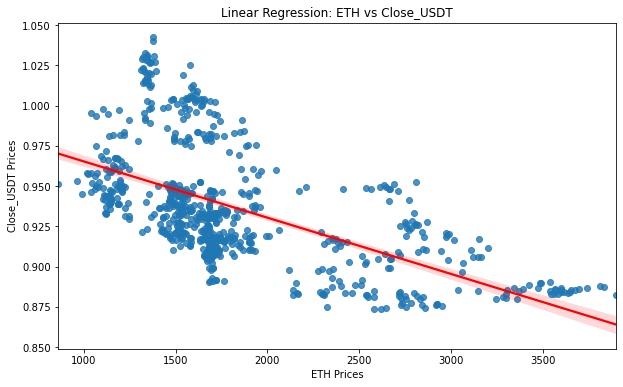

R-squared for ETH vs Close_USDT: 0.3327


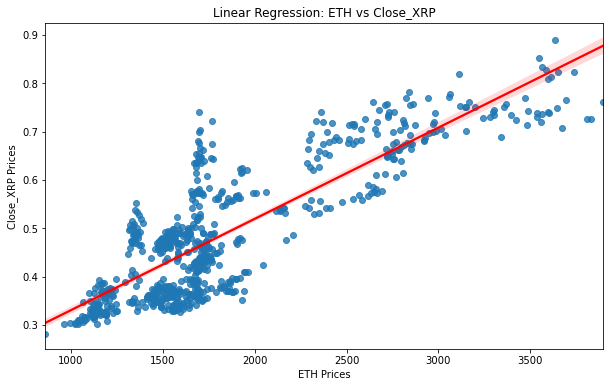

R-squared for ETH vs Close_XRP: 0.7054


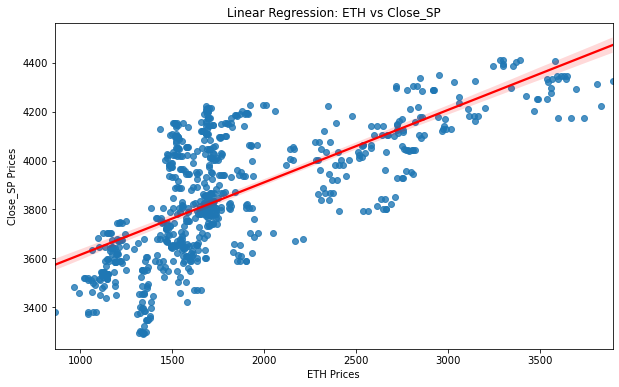

R-squared for ETH vs Close_SP: 0.4853


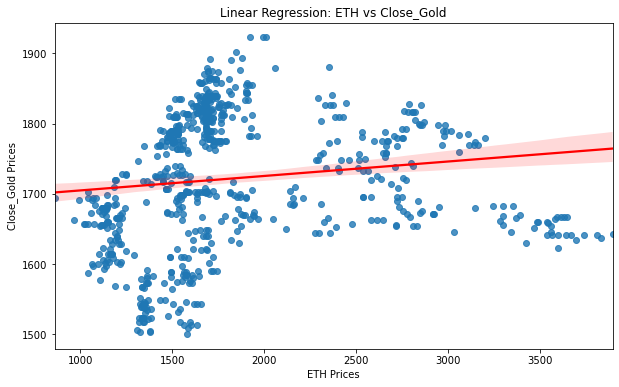

R-squared for ETH vs Close_Gold: 0.0173


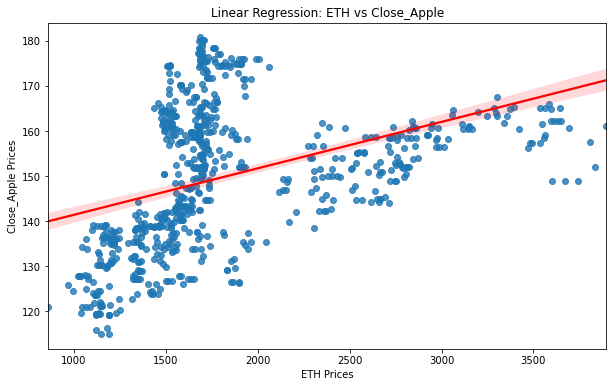

R-squared for ETH vs Close_Apple: 0.1595


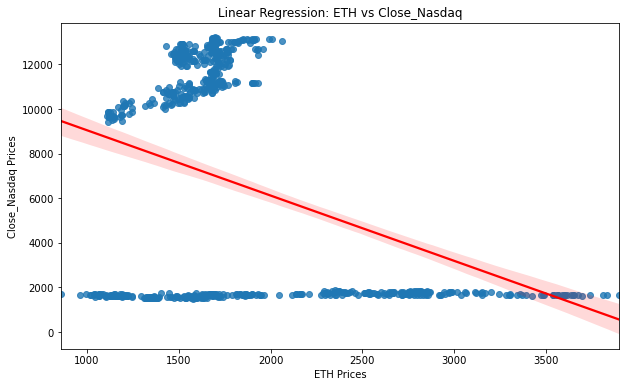

R-squared for ETH vs Close_Nasdaq: 0.1226


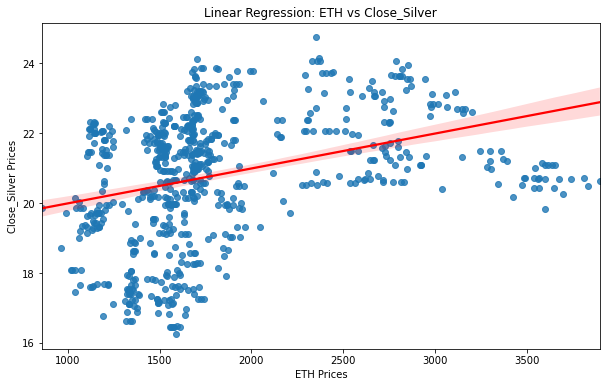

R-squared for ETH vs Close_Silver: 0.1073


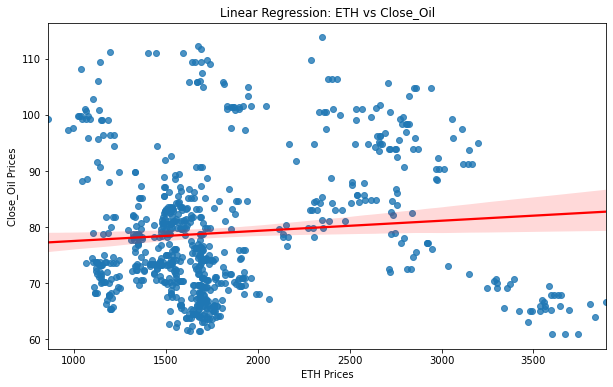

R-squared for ETH vs Close_Oil: 0.0085


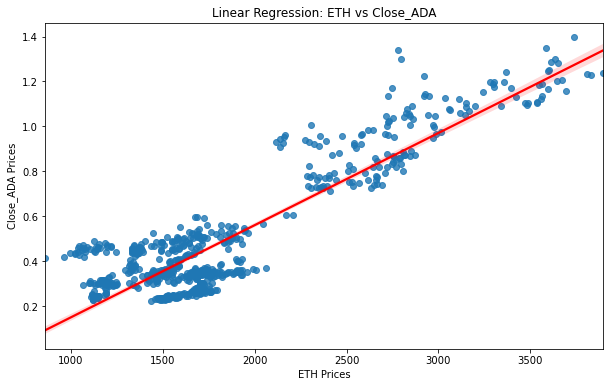

R-squared for ETH vs Close_ADA: 0.7934


In [29]:

"""
To ensure that the underlying assumptions for using Pearson correlation hold for our dataset,
we need to verify a few key aspects:

1) Linearity: The Pearson correlation coefficient measures the degree of a linear relationship 
between two variables.

2) Bivariate Normal Distribution: Both variables should ideally be normally distributed, 
however, it's more important that their joint distribution forms a bell-shaped pattern.

3) Homoscedasticity: The variance within each variable should be consistent, 
meaning the scatter of data points should be the same across all values.

4) Independence: Each pair of observations should be independent, a challenging factor in time series 
data due to autocorrelation.

5) No Outliers: Outliers can skew the Pearson correlation, so it's important to detect and handle them 
appropriately.

But we need to note that while these assumptions are ideal, slight violations may not drastically 
impact our results

"""

#1) Linearity check:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm

for column in df_clean.columns:
    if column != 'Close_ETH':
        # Plotting scatter plot with linear regression line
        plt.figure(figsize=(10, 6))
        sns.regplot(x='Close_ETH', y=column, data=df_clean, order=1, line_kws={"color": "red"})
        plt.title(f'Linear Regression: ETH vs {column}')
        plt.xlabel('ETH Prices')
        plt.ylabel(f'{column} Prices')
        plt.show()

        # Calculating R-squared value
        X = sm.add_constant(df_clean['Close_ETH'])
        model = sm.OLS(df_clean[column], X).fit()
        print(f"R-squared for ETH vs {column}: {model.rsquared:.4f}")



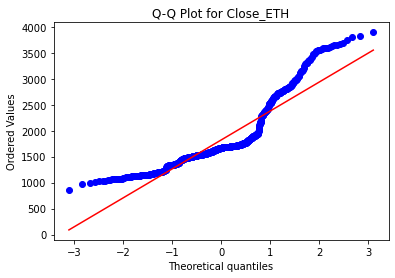

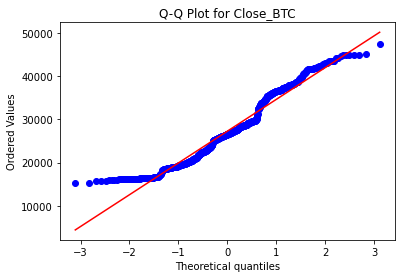

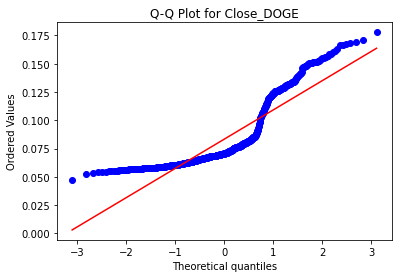

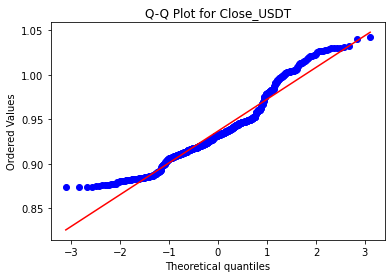

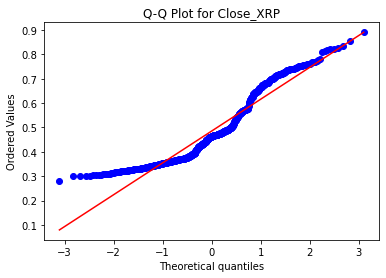

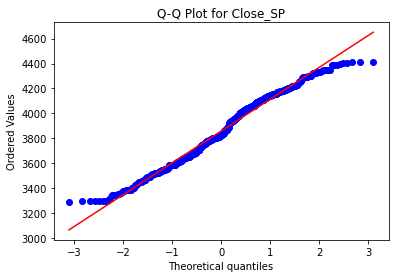

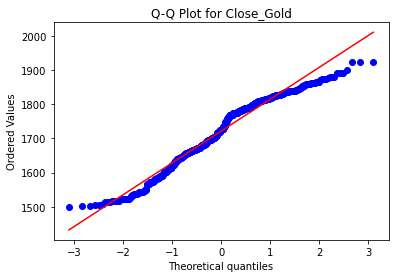

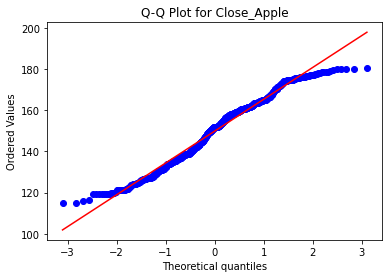

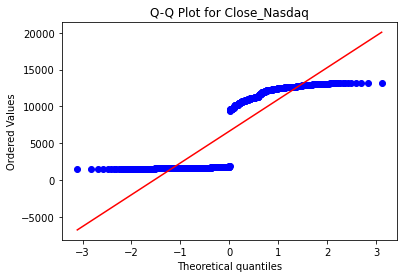

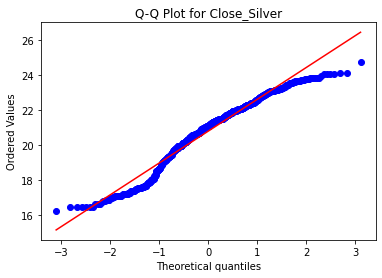

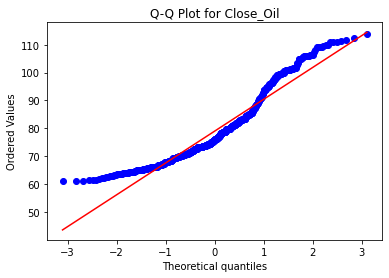

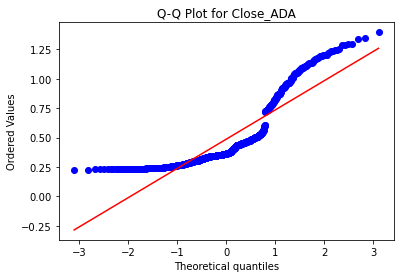

In [30]:
#2) Normality check: 
import scipy.stats as stats

# Q-Q plots for each cryptocurrency, including Ethereum
for column in df_clean.columns:
    stats.probplot(df_clean[column], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {column}')
    plt.show()


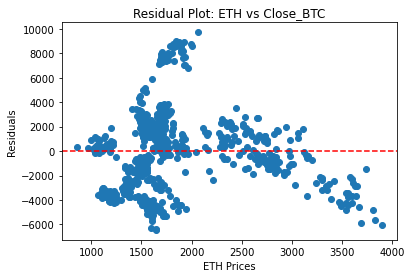

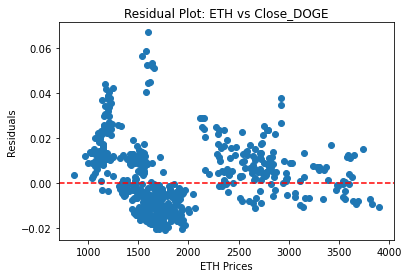

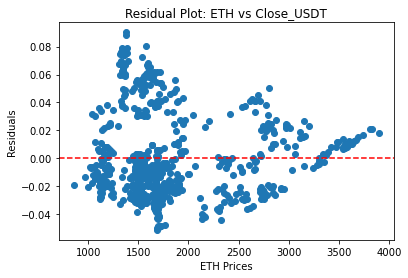

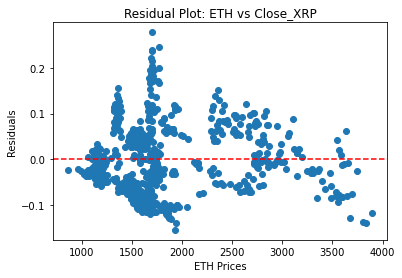

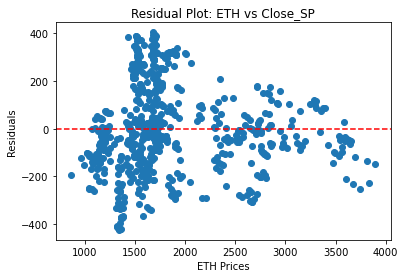

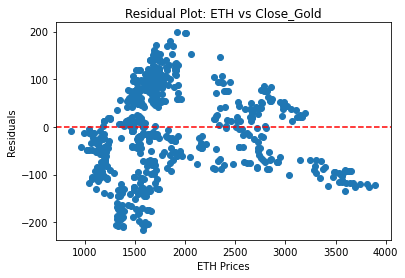

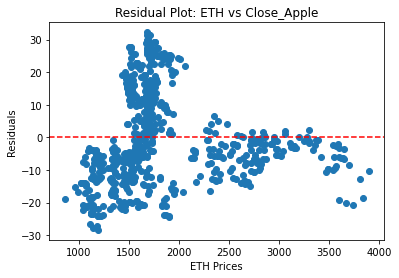

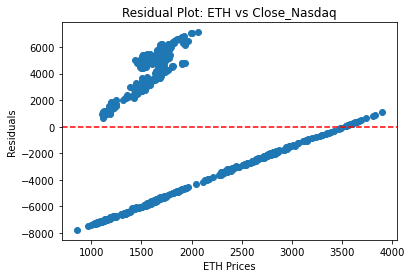

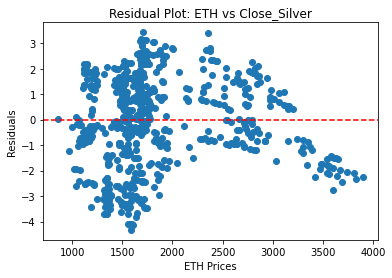

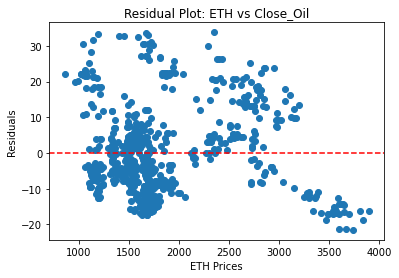

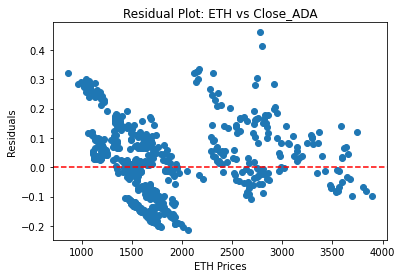

In [31]:
#3) Homoscedasticity check: 
from sklearn.linear_model import LinearRegression
import numpy as np

lr = LinearRegression()

# For each cryptocurrency
for column in df_clean.columns:
    if column != 'Close_ETH':
        X = df_clean['Close_ETH'].values.reshape(-1, 1)
        y = df_clean[column].values
        lr.fit(X, y)
        predictions = lr.predict(X)
        residuals = y - predictions

        plt.scatter(df_clean['Close_ETH'], residuals)
        plt.title(f'Residual Plot: ETH vs {column}')
        plt.xlabel('ETH Prices')
        plt.ylabel('Residuals')
        plt.axhline(y=0, color='r', linestyle='--')
        plt.show()


In [32]:
#4) Independence check: 
#for a time series indpendence is complexed to assess need to consider autocorrelation
#therefore here we just assume this assumption has been met 

/Users/mijitrenkel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


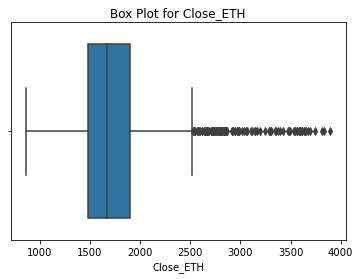

/Users/mijitrenkel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


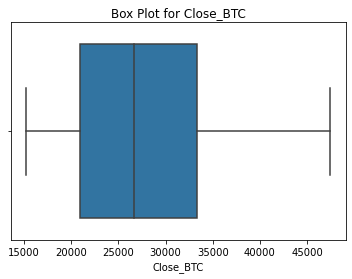

/Users/mijitrenkel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


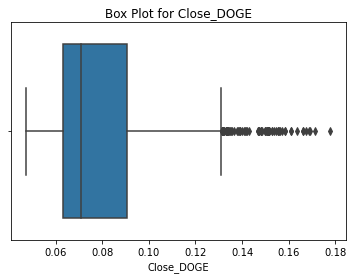

/Users/mijitrenkel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


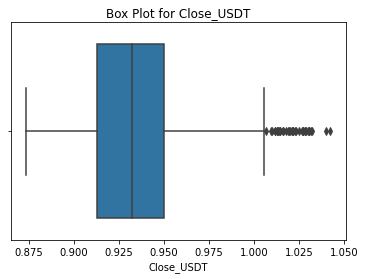

/Users/mijitrenkel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


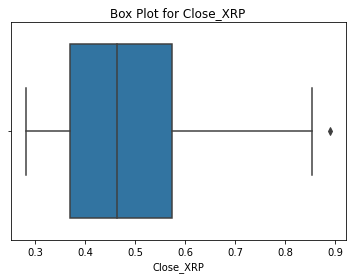

/Users/mijitrenkel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


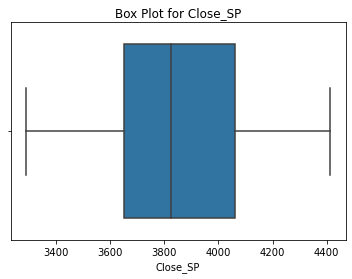

/Users/mijitrenkel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


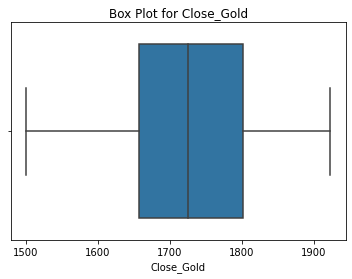

/Users/mijitrenkel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


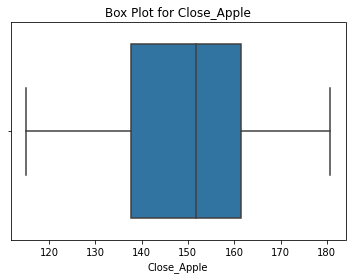

/Users/mijitrenkel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


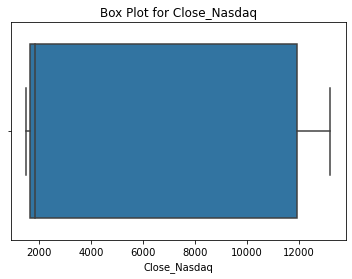

/Users/mijitrenkel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


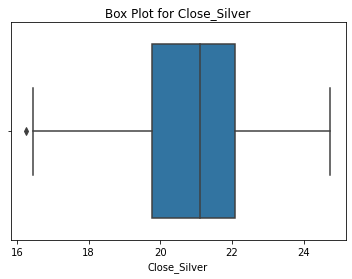

/Users/mijitrenkel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


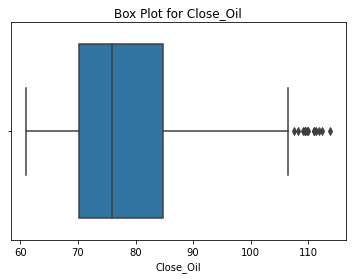

/Users/mijitrenkel/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


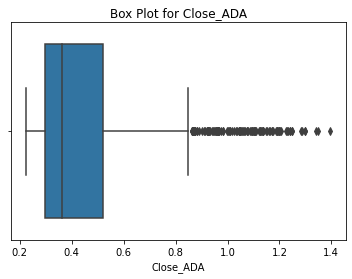

In [33]:
#5) Outliers check:
# Box plots for each cryptocurrency
for column in df_clean.columns:
    sns.boxplot(df_clean[column])
    plt.title(f'Box Plot for {column}')
    plt.show()


In [34]:
## Spearman's Rank Correlation Coefficient
"""
Non-linearity
Hypothesis 1 (Correlation Among Cryptocurrencies):

Null Hypothesis (H0): There is no significant correlation 
between the market values of Ethereum and other cryptocurrencies.

Alternative Hypothesis (H1): Market values of Ethereum exhibit a significant correlation 
with other cryptocurrencies.
"""

from scipy.stats import spearmanr

# initialise two dictionaries to store coefficients and p-values
correlations = {}
p_values = {}

for column in df_clean.columns:
    
    # exclude the ETH column
    if column != 'Close_ETH':  
        corr, p_value = spearmanr(df_clean['Close_ETH'], df_clean[column])
        
        correlations[column.replace('Close_', '')] = corr
        p_values[column.replace('Close_', '')] = p_value

        # check if the p-value is less than 0.05
        if p_value < 0.05:
            print(f"ETH has a significant correlation with {column.replace('Close_', '')}: Spearman Correlation Coefficient = {corr:.4f}, p-value = {p_value:.4f}")
        else:
            print(f"ETH does not have a significant correlation with {column.replace('Close_', '')}: Spearman Correlation Coefficient = {corr:.4f}, p-value = {p_value:.4f}")

ETH has a significant correlation with BTC: Spearman Correlation Coefficient = 0.9191, p-value = 0.0000
ETH has a significant correlation with DOGE: Spearman Correlation Coefficient = 0.5854, p-value = 0.0000
ETH has a significant correlation with USDT: Spearman Correlation Coefficient = -0.6519, p-value = 0.0000
ETH has a significant correlation with XRP: Spearman Correlation Coefficient = 0.7486, p-value = 0.0000
ETH has a significant correlation with SP: Spearman Correlation Coefficient = 0.7251, p-value = 0.0000
ETH has a significant correlation with Gold: Spearman Correlation Coefficient = 0.3245, p-value = 0.0000
ETH has a significant correlation with Apple: Spearman Correlation Coefficient = 0.5443, p-value = 0.0000
ETH has a significant correlation with Nasdaq: Spearman Correlation Coefficient = 0.0987, p-value = 0.0076
ETH has a significant correlation with Silver: Spearman Correlation Coefficient = 0.3952, p-value = 0.0000
ETH does not have a significant correlation with Oil:

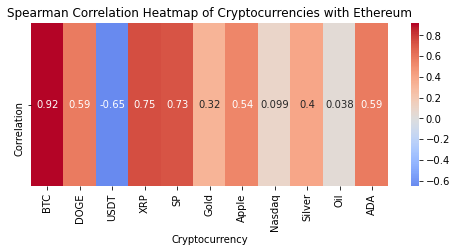

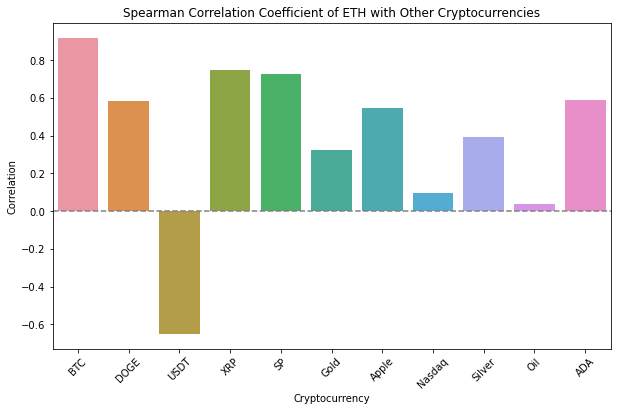

,Correlation,P-value
Cryptocurrency,,
BTC,0.9191,0.0000
DOGE,0.5854,0.0000
USDT,-0.6519,0.0000
XRP,0.7486,0.0000
SP,0.7251,0.0000
Gold,0.3245,0.0000
Apple,0.5443,0.0000
Nasdaq,0.0987,0.0076
Silver,0.3952,0.0000


In [35]:
import pandas as pd
# Create DataFrames from the dictionaries
spearman_corr_df = pd.DataFrame(list(correlations.items()), columns=['Cryptocurrency', 'Correlation'])
spearman_p_values_df = pd.DataFrame(list(p_values.items()), columns=['Cryptocurrency', 'P-value'])

# Merge the DataFrames
spearman_combined_df = pd.merge(spearman_corr_df, spearman_p_values_df, on='Cryptocurrency')
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap-like visualization for the correlation values
spearman_combined_df.set_index('Cryptocurrency', inplace=True)
plt.figure(figsize=(8, 3))
sns.heatmap(spearman_combined_df[['Correlation']].T, annot=True, cmap='coolwarm', center=0)
plt.title('Spearman Correlation Heatmap of Cryptocurrencies with Ethereum')
plt.show()

# Create a bar chart for the correlation values
plt.figure(figsize=(10, 6))
sns.barplot(x=spearman_combined_df.index, y=spearman_combined_df['Correlation'])
plt.title('Spearman Correlation Coefficient of ETH with Other Cryptocurrencies')
plt.axhline(0, color='grey', linestyle='--')
plt.xticks(rotation=45)  # Rotate x labels if they overlap
plt.show()

# Display the DataFrame with formatted numbers
spearman_combined_df.style.format({'Correlation': '{:.4f}', 'P-value': '{:.4f}'})



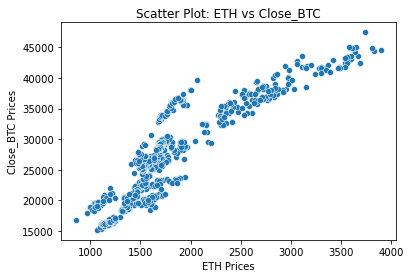

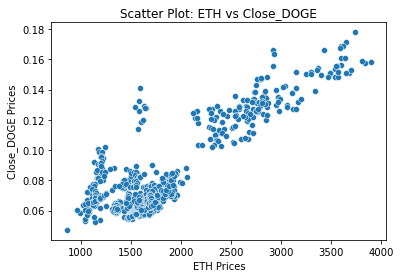

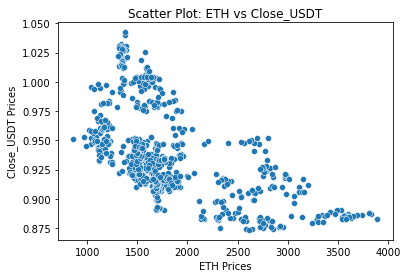

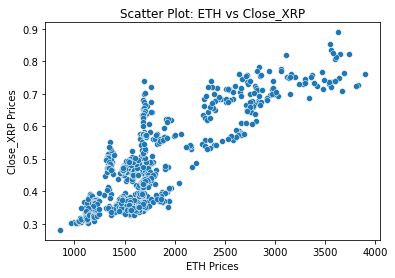

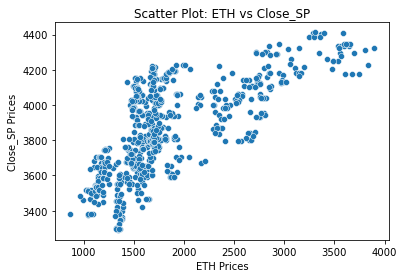

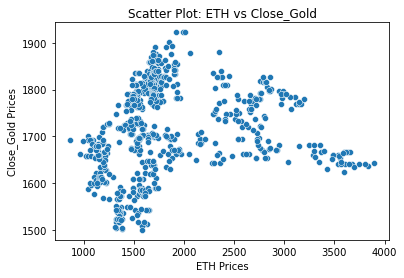

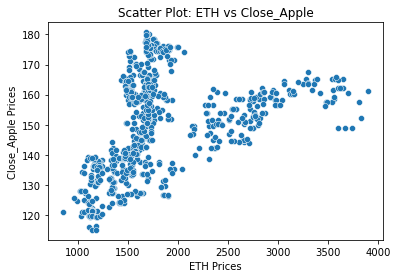

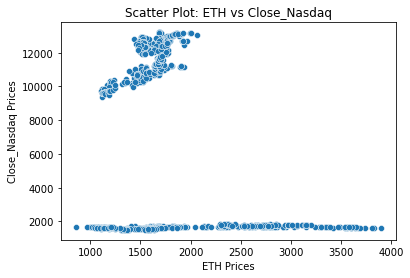

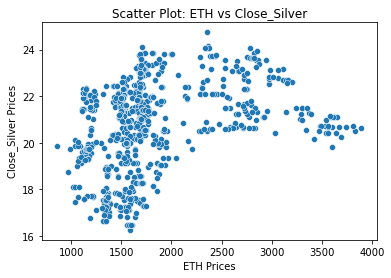

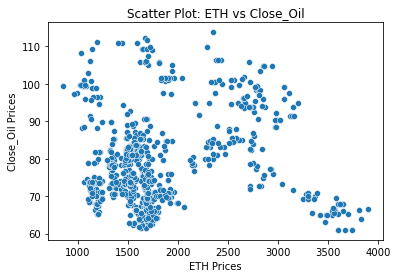

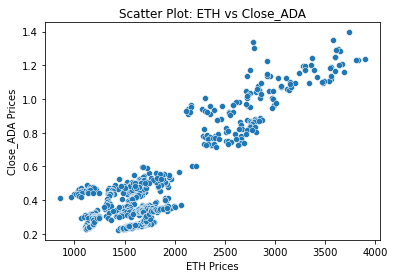

In [36]:

"""
To ensure that the underlying assumptions for using Spearman's rank correlation coefficient correlation hold 
for our dataset, we need to verify a few key aspects:

1) Monotonic Relationship: The Spearman correlation measures the strength and direction of a monotonic 
relationship between two variables. A monotonic relationship either consistently increases or decreases 
as one variable increases.

2)Ordinal Data: Spearman correlation is most suitable for ordinal data, where data can be ranked but not 
necessarily measured, but it can also be applied to interval and ratio data.

3)No Repeated Data Values: The Spearman correlation is most effective when there are few tied ranks in the data. 
Tied ranks occur when the same value appears multiple times. While it can handle ties, many can affect the 
correlation strength.

But we need to note that while these assumptions are ideal, slight violations may not drastically 
impact our results

"""
# Montonic Relationship

        
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Close_ETH' is your Ethereum data and 'column' is the other cryptocurrency
for column in df_clean.columns:
    if column != 'Close_ETH':
        sns.scatterplot(x=df_clean['Close_ETH'], y=df_clean[column])
        plt.title(f'Scatter Plot: ETH vs {column}')
        plt.xlabel('ETH Prices')
        plt.ylabel(f'{column} Prices')
        plt.show()


In [37]:
#3)Uniqueness 

# Check for repeated values in Ethereum prices
unique_eth = df_clean['Close_ETH'].nunique()
total_eth = df_clean['Close_ETH'].count()
print(f"Unique ETH Prices: {unique_eth}, Total ETH Prices: {total_eth}")

# Check for other cryptocurrencies
for column in df_clean.columns:
    if column != 'Close_ETH':
        unique_crypto = df_clean[column].nunique()
        total_crypto = df_clean[column].count()
        print(f"Unique prices for {column.replace('Close_', '')}: {unique_crypto}, Total prices: {total_crypto}")


Unique ETH Prices: 729, Total ETH Prices: 732
Unique prices for BTC: 719, Total prices: 732
Unique prices for DOGE: 724, Total prices: 732
Unique prices for USDT: 529, Total prices: 732
Unique prices for XRP: 652, Total prices: 732
Unique prices for SP: 502, Total prices: 732
Unique prices for Gold: 466, Total prices: 732
Unique prices for Apple: 478, Total prices: 732
Unique prices for Nasdaq: 493, Total prices: 732
Unique prices for Silver: 487, Total prices: 732
Unique prices for Oil: 467, Total prices: 732
Unique prices for ADA: 653, Total prices: 732


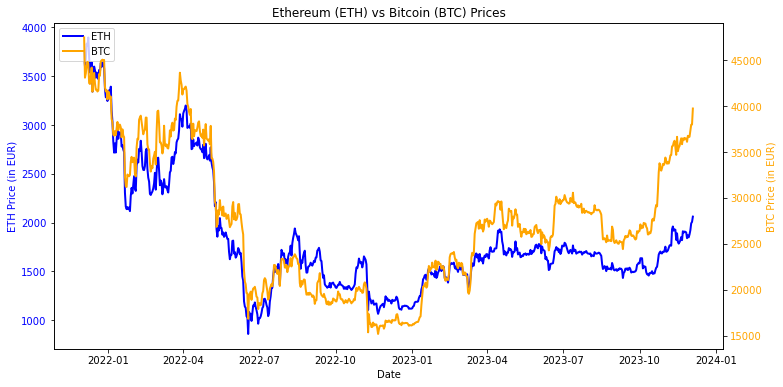

In [38]:
# Extract the date index and ETH/BTC columns from the cleaned DataFrame
date_index = df_clean.index
eth_values = df_clean['Close_ETH']
btc_values = df_clean['Close_BTC']

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))
plt.title('Ethereum (ETH) vs Bitcoin (BTC) Prices')
plt.xlabel('Date')
ax1.grid(False)  # Remove grid lines

# Plot ETH values on the primary y-axis (left)
ax1.set_ylabel('ETH Price (in EUR)', color='blue')
ax1.plot(date_index, eth_values, label='ETH', color='blue', linewidth=2)
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis (right) scaled to BTC values
ax2 = ax1.twinx()
ax2.set_ylabel('BTC Price (in EUR)', color='orange')
ax2.plot(date_index, btc_values, label='BTC', color='orange', linewidth=2)
ax2.tick_params(axis='y', labelcolor='orange')

# Add a legend for both lines
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper left")

# Show the plot
plt.show()


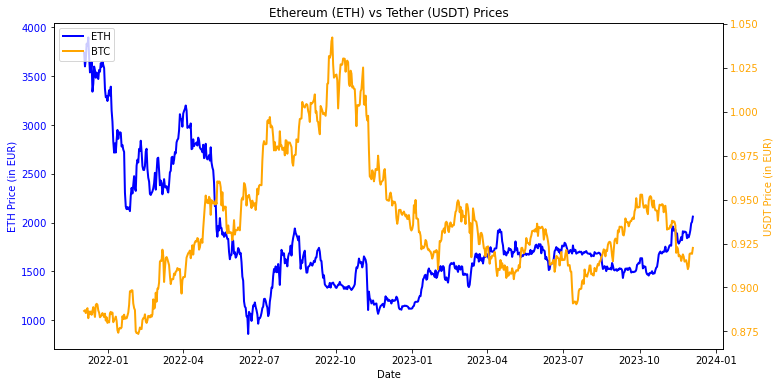

In [39]:
# Extract the date index and ETH/BTC columns from the cleaned DataFrame
date_index = df_clean.index
eth_values = df_clean['Close_ETH']
usdt_values = df_clean['Close_USDT']

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))
plt.title('Ethereum (ETH) vs Tether (USDT) Prices')
plt.xlabel('Date')
ax1.grid(False)  # Remove grid lines

# Plot ETH values on the primary y-axis (left)
ax1.set_ylabel('ETH Price (in EUR)', color='blue')
ax1.plot(date_index, eth_values, label='ETH', color='blue', linewidth=2)
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis (right) scaled to BTC values
ax2 = ax1.twinx()
ax2.set_ylabel('USDT Price (in EUR)', color='orange')
ax2.plot(date_index, usdt_values, label='BTC', color='orange', linewidth=2)
ax2.tick_params(axis='y', labelcolor='orange')

# Add a legend for both lines
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc="upper left")

# Show the plot
plt.show()


In [40]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller


# Now perform the ADF test on the cleaned extended data
columns = df_clean.columns
df_clean_stationary = pd.DataFrame(index=df_clean.index)

for column in columns:
    # Original series ADF test
    adf_result_original = adfuller(df_clean[column].dropna())
    print(f"ADF Test Results for Original {column}:")
    print('ADF Statistic: %f' % adf_result_original[0])
    print('p-value: %f' % adf_result_original[1])

    if adf_result_original[1] < 0.05:
        print(f"The original time series of {column} is stationary.\n")
        df_clean_stationary[column] = df_clean[column]
    else:
        print(f"The original time series of {column} is not stationary.\n")
        diff_series = df_clean[column].diff().dropna()

        # Differenced series ADF test
        adf_result_diff = adfuller(diff_series.dropna())
        print(f"ADF Test Results for Differenced {column}:")
        print('ADF Statistic: %f' % adf_result_diff[0])
        print('p-value: %f' % adf_result_diff[1])

        if adf_result_diff[1] < 0.05:
            print(f"The differenced time series of {column} is stationary.\n")
            df_clean_stationary[column] = diff_series.fillna(method='bfill')
            
        else:
            print(f"The differenced time series of {column} is still not stationary.\n")
    
    print("\n" + "-"*50 + "\n")

df_clean_stationary.dropna(inplace=True)
# Display the head of the cleaned stationary extended dataframe
print(df_clean_stationary.head())


ADF Test Results for Original Close_ETH:
ADF Statistic: -3.413452
p-value: 0.010509
The original time series of Close_ETH is stationary.


--------------------------------------------------

ADF Test Results for Original Close_BTC:
ADF Statistic: -2.237581
p-value: 0.192890
The original time series of Close_BTC is not stationary.

ADF Test Results for Differenced Close_BTC:
ADF Statistic: -27.674421
p-value: 0.000000
The differenced time series of Close_BTC is stationary.


--------------------------------------------------

ADF Test Results for Original Close_DOGE:
ADF Statistic: -2.662265
p-value: 0.080799
The original time series of Close_DOGE is not stationary.

ADF Test Results for Differenced Close_DOGE:
ADF Statistic: -8.448427
p-value: 0.000000
The differenced time series of Close_DOGE is stationary.


--------------------------------------------------

ADF Test Results for Original Close_USDT:
ADF Statistic: -1.838379
p-value: 0.361581
The original time series of Close_USDT is

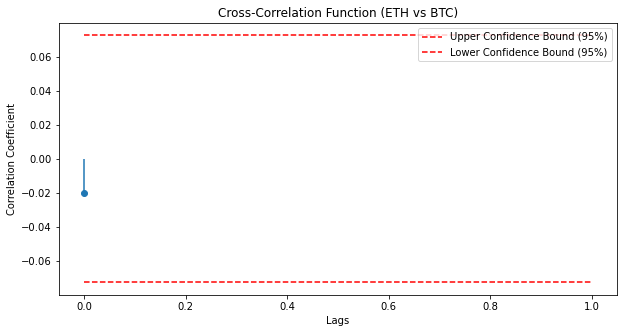

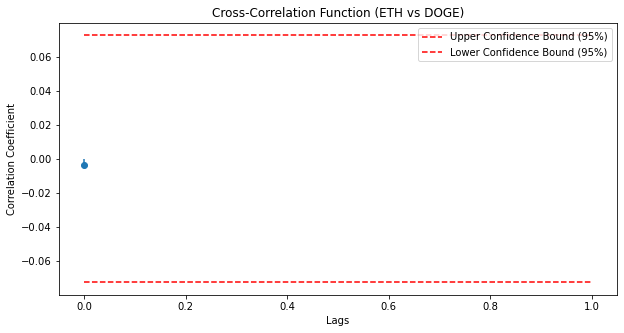

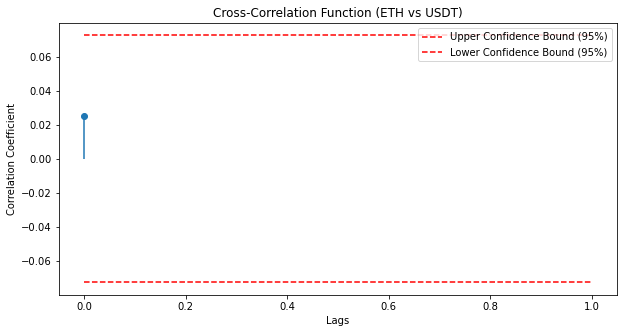

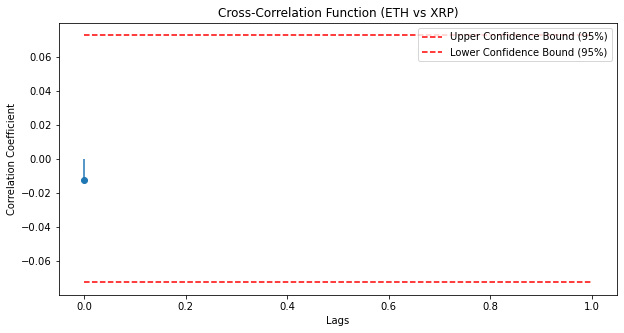

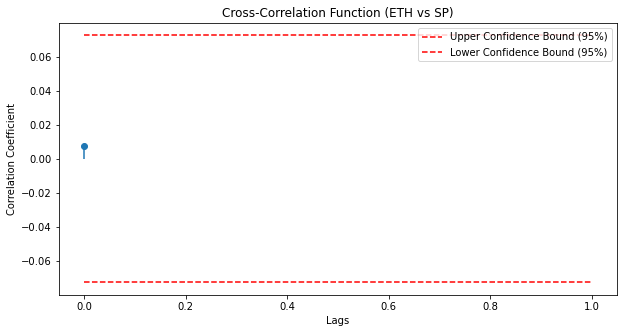

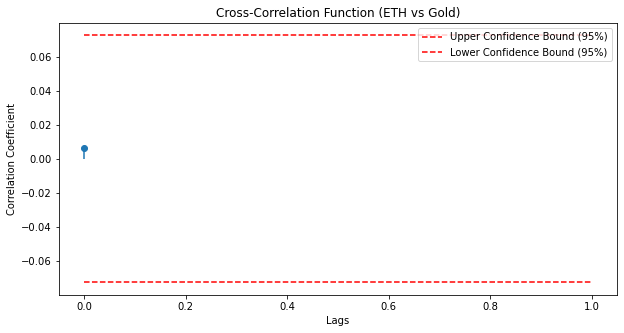

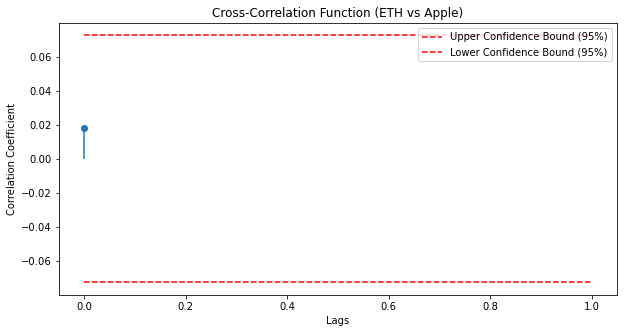

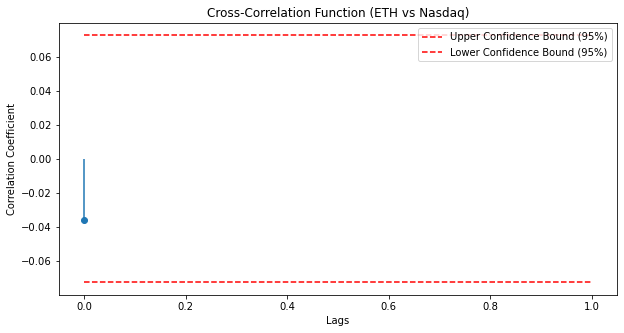

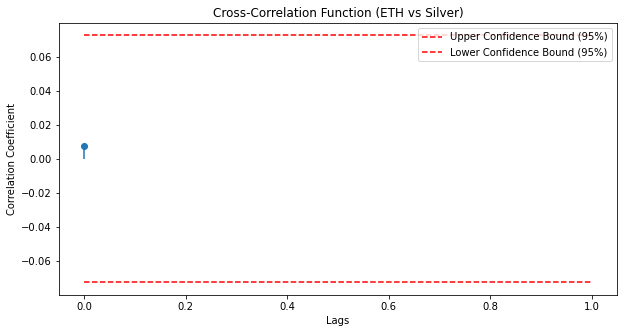

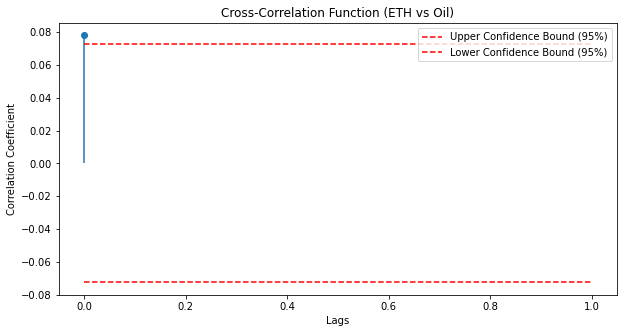

In [68]:
#SKIP (or briefly mention but just in 1 slide)
#Hypothesis 2:
"""
Null Hypothesis (H0): There is no discernible delay in correlation between the market values of Ethereum, other 
cryptocurrencies and other market indicators. 
Alternative Hypothesis (H1): A discernible delay exists in the correlation between the market values of 
Ethereum, other cryptocurrencie and other market indicators. 

Requires data to be stationary 

Goal is to dentify Significant Lags where the cross-correlation coefficients are significantly high
as these suggest a potential delay in the influence between Ethereum, other cryptocurrency and market indicators


"""
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import ccf

# Assuming 'df_clean_stationary' is your preprocessed DataFrame with stationary data
columns = ['Close_BTC', 'Close_DOGE', 'Close_USDT', 'Close_XRP', 'Close_SP','Close_Gold','Close_Apple',
          'Close_Nasdaq','Close_Silver','Close_Oil']

# Define the number of lags based on the frequency of your data
# For daily data, we might choose up to 30 lags. Adjust as needed for your dataset.
num_lags = 1

# Calculate the confidence interval for significance of the cross-correlations
# The usual significance level is chosen here as 95%
n = len(df_clean_stationary['Close_ETH'])
conf_interval = 1.96 / np.sqrt(n)  # 95% confidence interval

for column in columns:
    # Compute the cross-correlation function for a limited number of lags
    cross_corr = ccf(df_clean_stationary['Close_ETH'], df_clean_stationary[column])[:num_lags]

    # Plot the cross-correlation function with confidence intervals
    plt.figure(figsize=(10, 5))
    plt.stem(range(len(cross_corr)), cross_corr, use_line_collection=True, basefmt=" ")
    plt.hlines(conf_interval, xmin=0, xmax=num_lags, colors='r', linestyles='dashed', label='Upper Confidence Bound (95%)')
    plt.hlines(-conf_interval, xmin=0, xmax=num_lags, colors='r', linestyles='dashed', label='Lower Confidence Bound (95%)')
    plt.title(f'Cross-Correlation Function (ETH vs {column.replace("Close_", "")})')
    plt.xlabel('Lags')
    plt.ylabel('Correlation Coefficient')
    plt.legend()
    plt.show()



In [44]:

print(df_clean['Close_ETH'].head())


Date
2021-12-03    3740.07
2021-12-04    3599.83
2021-12-05    3672.30
2021-12-06    3832.43
2021-12-07    3809.00
Freq: D, Name: Close_ETH, dtype: float64


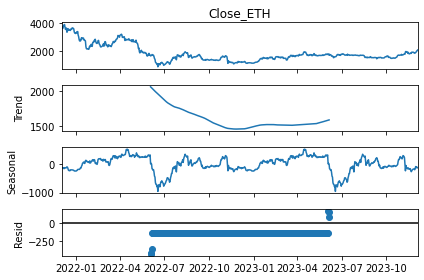

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

decomposition = seasonal_decompose(df_clean['Close_ETH'], model='additive', period=365)
decomposition.plot()
plt.show()


In [69]:
#Hypothesis 3 ARIMA:
"""
The Autoregressive Integrated Moving Average (ARIMA) model is a time series forecasting
Assumptions:
Stationarity: ARIMA assumes that the time series data is stationary, which means that the statistical properties 
of the data, such as mean, variance, and autocorrelation, do not change over time. 
Stationarity is essential because ARIMA models are designed to work with stationary data. 

Autocorrelation: ARIMA assumes that there is some correlation between the values of the time series at 
different time lags. This is captured by the autoregressive (AR) component of the model. The AR component 
represents the linear relationship between the current value of the series and its past values.

Moving Average: ARIMA assumes that there is a relationship between the current value of the time series and 
the past white noise errors (residuals) in the series. This is captured by the moving average (MA) component of 
the model.

Linearity: ARIMA is a linear model, which means it assumes that the relationship between the current value and 
past values (for AR component) or past residuals (for MA component) is a linear one. Nonlinear relationships may 
not be well-captured by ARIMA.

Independence of Errors: ARIMA assumes that the errors (residuals) of the model are independent and identically 
distributed (i.i.d.). This assumption implies that there is no remaining systematic pattern or correlation in 
the residuals after applying the ARIMA model.

Adequate Data: ARIMA models require a sufficient amount of historical data to estimate model parameters
accurately. The exact amount of data needed may vary depending on the complexity of the model and the 
characteristics of the time series.

"""



'\nThe Autoregressive Integrated Moving Average (ARIMA) model is a time series forecasting\nAssumptions:\nStationarity: ARIMA assumes that the time series data is stationary, which means that the statistical properties \nof the data, such as mean, variance, and autocorrelation, do not change over time. \nStationarity is essential because ARIMA models are designed to work with stationary data. \n\nAutocorrelation: ARIMA assumes that there is some correlation between the values of the time series at \ndifferent time lags. This is captured by the autoregressive (AR) component of the model. The AR component \nrepresents the linear relationship between the current value of the series and its past values.\n\nMoving Average: ARIMA assumes that there is a relationship between the current value of the time series and \nthe past white noise errors (residuals) in the series. This is captured by the moving average (MA) component of \nthe model.\n\nLinearity: ARIMA is a linear model, which means it

In [ ]:
#Hypothesis 3 Random forest:ignore for now
"""
Random Forest Regressor
Suitable For: Capturing non-linear relationships between features and the target variable.

Assumptions: Less stringent about data stationarity; can handle complex, non-linear relationships.
Strengths: Good for capturing complex relationships; inherently handles feature interactions; provides 
feature importance.

Use Case: Use Random Forest if you have multiple predictors (like past ETH prices, technical indicators, 
other correlated assets) and you suspect complex, non-linear dynamics.

Use cross-validation to tune hyperparameters (number of trees, depth).

"""

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Using only Ethereum data for this: Base Model
eth_data = df_clean_stationary_extended['Close_ETH']

# Feature Engineering: Create lagged features (1-day lag, 7-day lag)
eth_data_lagged = pd.concat([eth_data.shift(1), eth_data.shift(7)], axis=1)
eth_data_lagged.columns = ['ETH_lag_1', 'ETH_lag_7']
eth_data_lagged['ETH_rolling_mean_7'] = eth_data.rolling(window=7).mean()
eth_data_lagged.dropna(inplace=True)


# Define X and y
X = eth_data_lagged
y = eth_data[eth_data_lagged.index].shift(-1)  # Shift y by one day to align with X

# Drop the last row from X and y since there's no corresponding y value
X = X.iloc[:-1]
y = y.iloc[:-1]

# TimeSeries Cross-validator
tscv = TimeSeriesSplit(n_splits=5)

# Initialize Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=1)

# Cross-Validation
mse_scores = []
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Model Training and Prediction
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    mse_scores.append(mse)
    

# Calculate and print the average MSE
average_mse = np.mean(mse_scores)
print('Average MSE Base Model:', average_mse)

# Plot the average predicted vs actual values for the last fold (as an example)
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual ETH Closing Prices', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted - RandomForest Base Model', linestyle='--', marker='o')
plt.title('Actual vs Predicted ETH Closing Prices - RandomForest')
plt.xlabel('Date')
plt.ylabel('Closing Price (ETH)')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
from itertools import combinations


df_clean_stationary_extended.dropna(inplace=True)

# Base Model - Only ETH data
X_base = df_clean_stationary_extended[['Close_ETH']]
y = df_clean_stationary_extended['Close_ETH']

# List of additional variables
additional_variables = ['Close_BTC', 'Close_DOGE', 'Close_USDT', 'Close_XRP', 'Close_SP',
                        'Close_Gold', 'Close_Apple', 'Close_Nasdaq', 'Close_Silver', 'Close_Oil']

# Initialize dictionary to store MSE for each model
mse_results = {}

# TimeSeries Cross-validator
tscv = TimeSeriesSplit(n_splits=5)

# Function to train and evaluate the model
def train_and_evaluate(X, y, model, variable_name):
    mse_scores = []
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Model Training and Prediction
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Calculate Mean Squared Error
        mse = mean_squared_error(y_test, y_pred)
        mse_scores.append(mse)

    mse_results[variable_name] = np.mean(mse_scores)

# Base model
base_model = RandomForestRegressor()
train_and_evaluate(X_base, y, base_model, 'Base_Model (Only ETH)')

# Adding each cryptocurrency/stock one by one
for var in additional_variables:
    X_extended = df_clean_stationary_extended[['Close_ETH', var]]
    train_and_evaluate(X_extended, y, base_model, f'ETH + {var}')

# Adding combinations of two cryptocurrencies/stocks
for combo in combinations(additional_variables, 2):
    X_combo = df_clean_stationary_extended[['Close_ETH'] + list(combo)]
    train_and_evaluate(X_combo, y, base_model, f'ETH + {combo[0]} + {combo[1]}')

# Print or analyze mse_results
print(mse_results)


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt

# ACF and PACF plots to help determine the order
fig, ax = plt.subplots(2,1, figsize=(10,8))
sm.graphics.tsa.plot_acf(df_clean_stationary_extended['Close_ETH'].dropna(), lags=40, ax=ax[0])
sm.graphics.tsa.plot_pacf(df_clean_stationary_extended['Close_ETH'].dropna(), lags=40, ax=ax[1])
plt.show()

# Determine the order (p, d, q)
p, d, q = 1, 1, 1  # Replace with your values

# TimeSeries Cross-validator
tscv = TimeSeriesSplit(n_splits=5)
mse_scores = []

for train_index, test_index in tscv.split(df_clean_stationary_extended):
    train, test = df_clean_stationary_extended.iloc[train_index], df_clean_stationary_extended.iloc[test_index]
    model = ARIMA(train['Close_ETH'], order=(p, d, q))
    model_fit = model.fit()
    predictions = model_fit.forecast(len(test))
    mse = mean_squared_error(test['Close_ETH'], predictions)
    mse_scores.append(mse)

# Average MSE
average_mse = np.mean(mse_scores)
print(f'Average MSE for ARIMA: {average_mse}')


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5878.460, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5879.986, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5879.944, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5877.843, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5879.608, Time=0.24 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.406 seconds


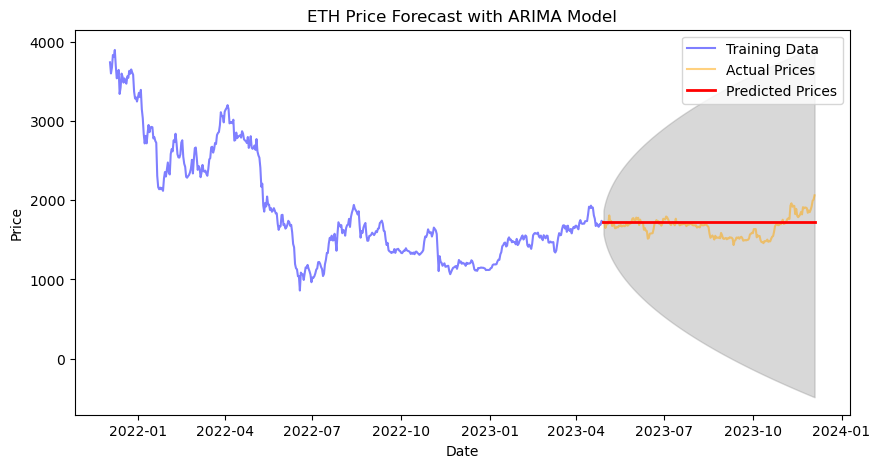

ARIMA Model RMSE: 134.25715276018897


In [4]:
# ARIMA Model
from pmdarima import auto_arima
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

# Select only ETH closing prices for endogenous variable
endog = df_clean['Close_ETH']

# Split the data into training and validation sets
split_point = int(len(endog) * 0.7)
train_endog = endog[:split_point]
valid_endog = endog[split_point:]

# Find the best ARIMA model
auto_model = auto_arima(train_endog, seasonal=True, start_p=0, start_q=0,
                        max_p=15, max_q=15, d=None, trace=True, error_action='ignore', 
                        suppress_warnings=True, stepwise=True, information_criterion='aic')

# Fit the ARIMA model to the training data using statsmodels
model_arima = ARIMA(train_endog, order=auto_model.order)
model_arima_fit = model_arima.fit()

# Make predictions and get confidence intervals
forecast = model_arima_fit.get_forecast(steps=len(valid_endog))
predictions_arima = forecast.predicted_mean
conf_int = forecast.conf_int()

# Calculate error metrics
mse_arima = mean_squared_error(valid_endog, predictions_arima)
rmse_arima = np.sqrt(mse_arima)

# Plotting the results with confidence intervals
plt.figure(figsize=(10, 5))
plt.plot(train_endog.index, train_endog, label='Training Data', color='blue', alpha=0.5)
plt.plot(valid_endog.index, valid_endog, label='Actual Prices', color='orange', alpha=0.5)
plt.plot(valid_endog.index, predictions_arima, label='Predicted Prices', color='red', linewidth=2, linestyle='-')

# Add the confidence intervals
plt.fill_between(valid_endog.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='gray', alpha=0.3)

plt.title('ETH Price Forecast with ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

print("ARIMA Model RMSE:", rmse_arima)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=8208.664, Time=1.66 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=8212.157, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=8214.341, Time=0.17 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=8214.560, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=8211.032, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=8207.061, Time=1.36 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=4.34 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=8206.861, Time=2.13 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=inf, Time=5.31 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=8204.594, Time=5.39 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=8202.672, Time=5.27 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=8204.100, Time=4.77 sec
 ARIMA(1,1,2)(2,0,2)[12] intercept   : AIC=8207.335, Time=5.15 sec
 ARIMA(2,1,1)(2,0,2)[12] intercept

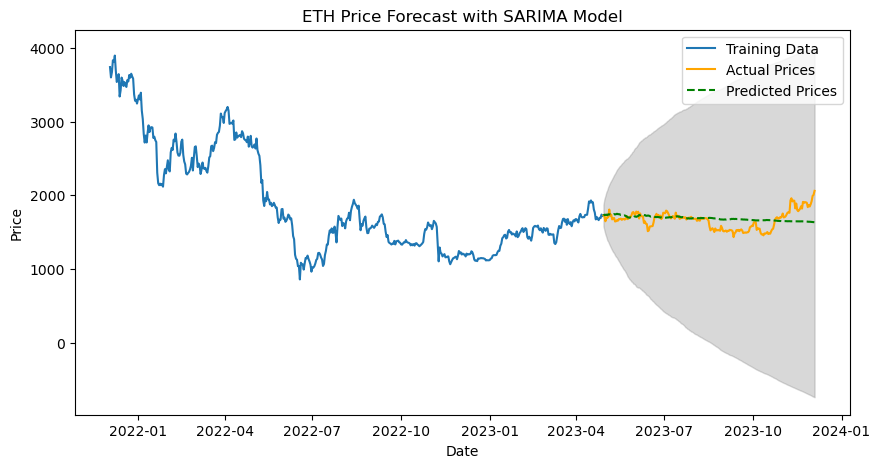

SARIMA Model RMSE: 130.4958567125404


In [5]:
# SARIMA Model
import numpy as np
import pandas as pd
from pmdarima import auto_arima
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Selecting only ETH closing prices
endog = df_clean['Close_ETH']

# Auto SARIMA model for ETH
model_sarima = auto_arima(endog, seasonal=True, m=12, trace=True,
                          error_action='ignore', suppress_warnings=True,
                          stepwise=True)

# Splitting the data into training and validation sets
split_point = int(len(endog) * 0.7)
train_endog = endog[:split_point]
valid_endog = endog[split_point:]

# Fit the model
model_sarima.fit(train_endog)

# Make predictions
predictions_sarima, conf_int = model_sarima.predict(n_periods=len(valid_endog), return_conf_int=True)

# Calculate error metrics
mse_sarima = mean_squared_error(valid_endog, predictions_sarima)
rmse_sarima = np.sqrt(mse_sarima)

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(train_endog.index, train_endog, label='Training Data')
plt.plot(valid_endog.index, valid_endog, label='Actual Prices', color='orange')
plt.plot(valid_endog.index, predictions_sarima, label='Predicted Prices', color='green', linestyle='--')


# Add the confidence intervals
plt.fill_between(valid_endog.index, conf_int[:, 0], conf_int[:, 1], color='gray', alpha=0.3)

plt.title('ETH Price Forecast with SARIMA Model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

print("SARIMA Model RMSE:", rmse_sarima)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=5877.699, Time=1.24 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=5878.460, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=5880.634, Time=0.09 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=5880.785, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=5877.843, Time=0.02 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=5875.752, Time=1.22 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=5873.765, Time=0.50 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=inf, Time=1.52 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=5881.193, Time=0.28 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=5881.075, Time=0.32 sec
 ARIMA(3,1,2)(0,0,0)[12] intercept   : AIC=5874.034, Time=0.55 sec
 ARIMA(2,1,3)(0,0,0)[12] intercept   : AIC=5874.518, Time=0.62 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=5879.608, Time=0.23 sec
 ARIMA(1,1,3)(0,0,0)[12] intercept   : AIC=5879.099, Time=0.47 sec
 ARIMA(3,1,1)(0,0,0)[12]

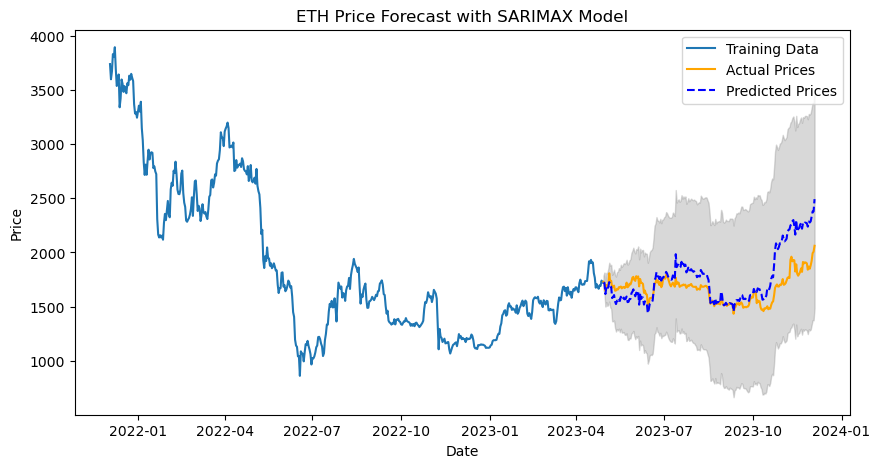

SARIMAX Model RMSE: 194.77754651041224


In [6]:
# SARIMAX Model
from statsmodels.tsa.statespace.sarimax import SARIMAX

# SARIMAX model with additional variables
exog = df_clean[['Close_BTC', 'Close_DOGE', 'Close_USDT', 'Close_XRP']]
endog = df_clean['Close_ETH']

# Splitting the data into training and validation sets
split_point = int(len(endog) * 0.7)
train_endog = endog[:split_point]
valid_endog = endog[split_point:]
train_exog = exog.iloc[:split_point]
valid_exog = exog.iloc[split_point:]

# Auto ARIMA to determine the best order and seasonal_order
auto_model = auto_arima(train_endog, exogenous=train_exog, seasonal=True, m=12, trace=True,
                        error_action='ignore', suppress_warnings=True, stepwise=True)

# Fit the SARIMAX model to the training data using the order and seasonal_order from auto_arima
model_sarimax = SARIMAX(train_endog, exog=train_exog, order=auto_model.order,
                        seasonal_order=auto_model.seasonal_order,
                        enforce_stationarity=False, enforce_invertibility=False)
model_sarimax_fit = model_sarimax.fit(disp=False)

# Make predictions
predictions_sarimax = model_sarimax_fit.get_prediction(start=valid_endog.index[0], end=valid_endog.index[-1], 
                                                       exog=valid_exog)
predicted_mean_sarimax = predictions_sarimax.predicted_mean
conf_int_sarimax = predictions_sarimax.conf_int()

# Calculate error metrics
mse_sarimax = mean_squared_error(valid_endog, predicted_mean_sarimax)
rmse_sarimax = np.sqrt(mse_sarimax)

# Plotting the results with confidence intervals
plt.figure(figsize=(10, 5))
plt.plot(train_endog.index, train_endog, label='Training Data')
plt.plot(valid_endog.index, valid_endog, label='Actual Prices', color='orange')
plt.plot(valid_endog.index, predicted_mean_sarimax, label='Predicted Prices', color='blue', linestyle='--')

# Add the confidence intervals
plt.fill_between(valid_endog.index, conf_int_sarimax.iloc[:, 0], conf_int_sarimax.iloc[:, 1], color='gray', alpha=0.3)

plt.title('ETH Price Forecast with SARIMAX Model')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

print("SARIMAX Model RMSE:", rmse_sarimax)